<a href="https://colab.research.google.com/github/viett887g/baitapgiuaki/blob/main/baitapgiuaki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1344]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1345]:
example1 = "/content/breast-cancer-wisconsin (1).data"
file1 = open(example1, "r").read()

In [1346]:
temp = []
for i in str.split(file1):
  i = str.split(i)
  temp.append(i)

data = []
for i in temp:
  i = i[0].split(',')
  data.append(i)
data = np.array(data)

In [1347]:
data=pd.DataFrame(data)
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


Xóa dữ liệu NAN
---

In [1348]:
data = data.dropna()
data

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [1349]:
data=np.array(data)
x= data[:,:-1]
y= data[:,-1]

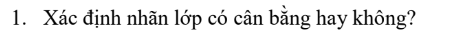

Text(0, 0.5, 'count')

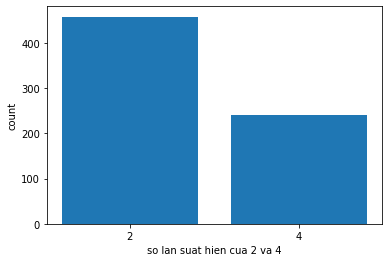

In [1350]:
count = [list(y).count("2"),list(y).count("4")]
lable = ["2","4"]
plt.bar(lable,count)
plt.xlabel("so lan suat hien cua 2 va 4")
plt.ylabel("count")

nhãn lớp không có cân bằng
---

In [1351]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [1352]:
n=0
for x in range(data.shape[0]):
  for y in range(data.shape[1]):
    if not data[x-n][y]== '?':
      data[x-n][y]=float(data[x-n][y])
    else:
      data=np.delete(data,obj=x-n,axis=0)
      n+=1

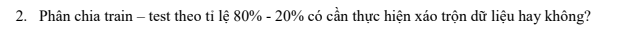

In [1353]:
data =preprocessing.MinMaxScaler().fit_transform(data)
X, y = data[:,:-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.200000000000000000,random_state=15)

In [1354]:
>>> from sklearn import datasets, linear_model
>>> from sklearn.model_selection import cross_val_score

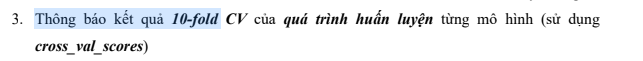

Thông báo kết quả 10-fold CV của quá trình huấn luyện từng mô hình (sử dụng cross_val_scores) LOGISTIC
---

In [1355]:
from sklearn.linear_model import LogisticRegression

In [1356]:
model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

In [1357]:
lasso = linear_model.Lasso()
hlmh=cross_val_score(lasso, X_train, y_train,cv=10)
print("mô hình dự đoán của logistic",hlmh)

mô hình dự đoán của logistic [-0.00057903 -0.00433183 -0.00433183 -0.04235598 -0.00433183 -0.01174093
 -0.00654569 -0.0023644  -0.0089235  -0.01495708]


Thông báo kết quả 10-fold CV của quá trình huấn luyện từng mô hình (sử dụng cross_val_scores) K_NN
---

In [1358]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)

KNeighborsClassifier()

In [1359]:
KNN = KNeighborsRegressor()
scores_knn = cross_val_score(KNN, X_train, y_train, cv = 10)
print("kết qua dự đoán của knn\n",scores_knn)

kết qua dự đoán của knn
 [0.97748538 0.824      0.81771429 0.93867596 0.80828571 0.80961538
 0.96823529 0.96565978 0.86144737 0.82233766]


Thông báo kết quả 10-fold CV của quá trình huấn luyện từng mô hình (sử dụng cross_val_scores) NAIVE
---

In [1360]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
scores = cross_val_score(gnb_model, X_train, y_train, cv = 10,scoring='accuracy')
print("kết qua dự đoán của NAIVE",scores)

kết qua dự đoán của NAIVE [0.98181818 0.96363636 0.96363636 0.96363636 0.94545455 0.96363636
 1.         0.98148148 0.96296296 0.96296296]


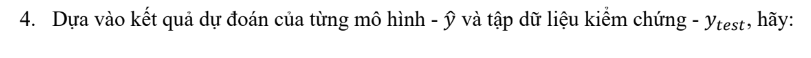
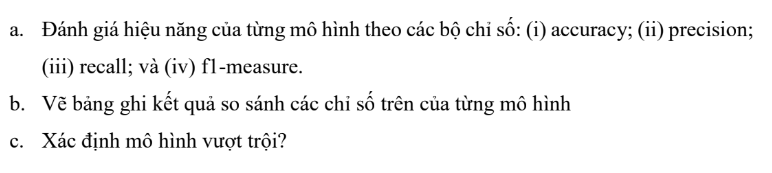

Mô Hình logistic
---

In [1361]:
from sklearn.model_selection import cross_val_predict
y_hat = cross_val_predict(model, X_test, y_test, cv=10)
print("y du doan cua logistic",y_hat)

y du doan cua logistic [1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.]


In [1362]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
ac=accuracy_score(y_hat, y_test)
print('Hiệu năng mô hình acc cua logistic : ', accuracy_score(y_hat, y_test))
ps=precision_score(y_test, y_hat,average='macro')
print("Hiệu năng mô hình precision cua logistic",ps)
rs =recall_score(y_test, y_hat, average='macro')
print("Hiệu năng mô hình recall cua logistic",rs)
f1= 2*(ps*rs)/(ps+rs)
print("Hiệu năng mô hình f1 cua logistic",f1)
f1_score(y_test, y_hat, average='macro')

Hiệu năng mô hình acc cua logistic :  0.9562043795620438
Hiệu năng mô hình precision cua logistic 0.9546957671957672
Hiệu năng mô hình recall cua logistic 0.9546957671957672
Hiệu năng mô hình f1 cua logistic 0.9546957671957672


0.9546957671957672

Text(0.5, 0, 'cac độ đo')

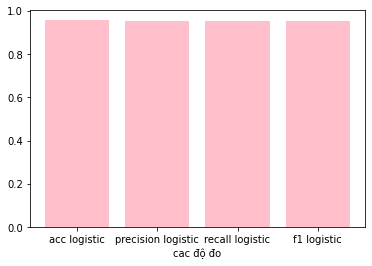

In [1363]:
coun=[ac,ps,rs,f1]
sticker=("acc logistic","precision logistic","recall logistic","f1 logistic")
plt.bar(sticker,coun,color="pink")
plt.xlabel("cac độ đo")

K- lân cận
---

In [1364]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)
y_hat_KNN = kNN.predict(X_test)
print("y dự đoán của K lân cận\n",y_hat_KNN)

y dự đoán của K lân cận
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]


In [1365]:
ac_KNN=accuracy_score(y_hat_KNN, y_test)
print("Hiệu năng mô hình acc cua K lân cận",ac_KNN)
ps_KNN=precision_score(y_test, y_hat_KNN,average='macro')
print("Hiệu năng mô hình precision cua K lân cận",ps_KNN)
rs_KNN =recall_score(y_test, y_hat_KNN, average='macro')
print("Hiệu năng mô hình recall cua K lân cận",rs_KNN)
f1_KNN= 2*(ps_KNN*rs_KNN)/(ps_KNN+rs_KNN)
print("Hiệu năng mô hình f1 cua K lân cận",f1_KNN)
f1_score(y_test, y_hat_KNN, average='macro')

Hiệu năng mô hình acc cua K lân cận 0.9635036496350365
Hiệu năng mô hình precision cua K lân cận 0.9635254988913525
Hiệu năng mô hình recall cua K lân cận 0.9608686067019401
Hiệu năng mô hình f1 cua K lân cận 0.9621952186931002


0.962140054164594

Text(0.5, 0, 'cac độ đo tai KNN')

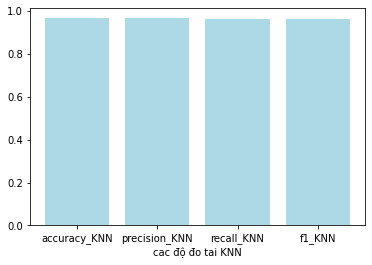

In [1366]:
coun1=[ac_KNN,ps_KNN,rs_KNN,f1_KNN]
sticker1=("accuracy_KNN","precision_KNN","recall_KNN","f1_KNN")
plt.bar(sticker1,coun1, width=0.8,color="lightblue")
plt.xlabel("cac độ đo tai KNN")

Ngây thơ
---

In [1367]:
from sklearn.naive_bayes import GaussianNB
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_hat_nv = gnb_model.predict(X_test)
print("y dự ddoasnd của Naive\n",y_hat_nv)

y dự ddoasnd của Naive
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.]


In [1368]:
ac_nv=accuracy_score(y_hat_nv, y_test)
print("Hiệu năng mô hình acc cua NAIVE",ac_nv)
ps_nv=precision_score(y_test, y_hat_nv,average='weighted')
print("Hiệu năng mô hình precision cua NAIVE",ps_nv)
rs_nv =recall_score(y_test, y_hat_nv, average='weighted')
print("Hiệu năng mô hình recall cua NAIVE",rs_nv)
#f1_nv= 2*(ps_nv*rs_nv)/(ps_nv+rs_nv)
f1_nv=f1_score(y_test, y_hat_KNN, average='weighted')
print("Hiệu năng mô hình f1 cua NAIVE",f1_nv)

Hiệu năng mô hình acc cua NAIVE 0.9343065693430657
Hiệu năng mô hình precision cua NAIVE 0.9375342448498895
Hiệu năng mô hình recall cua NAIVE 0.9343065693430657
Hiệu năng mô hình f1 cua NAIVE 0.9634512036554042


Text(0.5, 0, 'cac độ đo tai KNN')

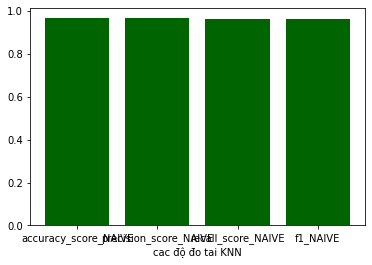

In [1369]:
coun2=[ac_nv,ps_nv,rs_nv,f1_nv]
sticker1=("accuracy_score_NAIVE","precision_score_NAIVE","recall_score_NAIVE","f1_NAIVE")
plt.bar(sticker1,coun1, width=0.8,color = 'darkgreen')
plt.xlabel("cac độ đo tai KNN")

so sanh kết quả 3 mô hình
---

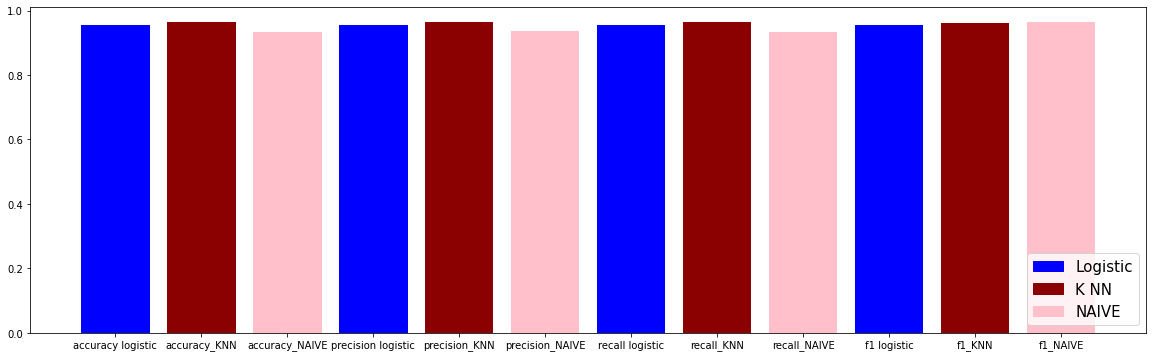

In [1370]:
from matplotlib.projections.polar import mpatches
f, ax = plt.subplots(figsize=(20,6)) # set the size that you'd like (width, height)
my_colors= ['blue','darkred', 'pink']
labels = ['logis','k lân cận','naive']
counss=[ac,ac_KNN,ac_nv]
counss2=[ps,ps_KNN,ps_nv]
counss3=[rs,ps_KNN,rs_nv]
countss4=[f1,f1_KNN,f1_nv]
stickerss=("accuracy logistic","accuracy_KNN","accuracy_NAIVE")
stickerss2=("precision logistic","precision_KNN","precision_NAIVE")
stickerss3=("recall logistic","recall_KNN","recall_NAIVE")
stickerss4=("f1 logistic","f1_KNN","f1_NAIVE")
plt.bar(stickerss,counss , label = 'accuracy_score',color=my_colors)
plt.bar(stickerss2,counss2, label = 'precision_score',color=my_colors)
plt.bar(stickerss3,counss3, label = 'recall_score',color=my_colors)
plt.bar(stickerss4,countss4, label = 'f1 bar',color=my_colors)
logistic = mpatches.Patch(color='Blue', label='Logistic')
KNN = mpatches.Patch(color='darkred', label='K NN')
NAIVE = mpatches.Patch(color='pink', label='NAIVE')

ax.legend(fontsize = 15,handles=[logistic,KNN,NAIVE],loc=4)

Đánh giá hiệu năng của từng mô hình
---

In [1371]:
counss=[ac,ac_KNN,ac_nv]
label = ['ac','ac_KNN','ac_nv']
for i in range(len(counss)):
  if counss[i] == max(counss):
    print("như vậy ta thấy mô hinh accuracy_score la ",label[i],"lớn nhất la bằng",counss[i])
counss2=[ps,ps_KNN,ps_nv]
label2=["ps","ps_KNN","ps_nv"]
for i in range(len(counss2)):
  if counss2[i] == max(counss2):
    print("như vậy ta thấy mô hinh precision_score la",label2[i],"lớn nhất la bằng",counss2[i])    
counss3=[rs,ps_KNN,rs_nv]
label3=["rs","ps_KNN","rs_nv"]
for i in range(len(counss3)):
  if counss3[i] == max(counss3):
    print("như vậy ta thấy mô hinh recall_score la",label3[i],"lớn nhất la bằng",counss3[i]) 
countss4=[f1,f1_KNN,f1_nv]
label4=["f1","f1_KNN","f1_nv"]
for i in range(len(countss4)):
  if countss4[i] == max(countss4):
    print("như vậy ta thấy mô hinh f1 la",label4[i],"lớn nhất la bằng",countss4[i])    


như vậy ta thấy mô hinh accuracy_score  ac_KNN lớn nhất la bằng 0.9635036496350365
như vậy ta thấy mô hinh precision_score  ps_KNN lớn nhất la bằng 0.9635254988913525
như vậy ta thấy mô hinh recall_score ps_KNN lớn nhất la bằng 0.9635254988913525
như vậy ta thấy mô hinh f1 f1_nv lớn nhất la bằng 0.9634512036554042


sử dụng tập dữ liệu wine cho đa nhãn lớp
 ----

In [1372]:
data=pd.read_csv("/content/Wine.csv")
data=np.array(data)
X= data[:,1:]
y = data[:,0]

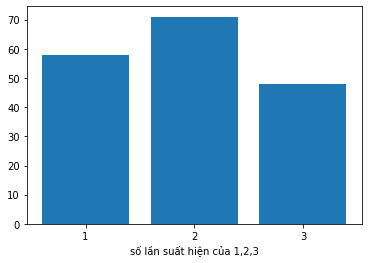

In [1373]:
unique, counts = np.unique(y, return_counts=True)
result = dict(zip(unique, counts))
lis=["1","2","3"]
count=[counts[0],counts[1],counts[2]]
plt.bar(lis,count)
plt.xlabel("số lần suất hiện của 1,2,3")
plt.show()


ta thấy 3 nhãn lớp này không cân bằng 
---


In [1374]:
X= data[:,1:]
X =preprocessing.MinMaxScaler().fit_transform(X)
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.200000000000000000,random_state=15)

In [1375]:
model = LogisticRegression(solver='liblinear', max_iter=1500, multi_class='auto')

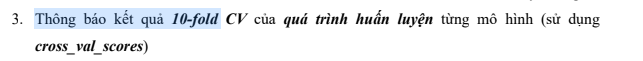

In [1376]:
lasso = linear_model.Lasso()
hlmh=cross_val_score(lasso, X_train, y_train,cv=10)
print("mô hình dự đoán của logistic",hlmh)

mô hình dự đoán của logistic [-2.70755068e-04 -7.46919141e-03 -5.56243381e-02 -1.31285263e-02
 -1.08020835e-04 -1.26976254e-02 -1.09129403e-01 -2.85477186e-01
 -1.86369303e-01 -1.76424267e-01]


Thông báo kết quả 10-fold CV của quá trình huấn luyện từng mô hình (sử dụng cross_val_scores) K_NN
---

In [1377]:
KNN = KNeighborsRegressor()
scores_knn = cross_val_score(KNN, X_train, y_train, cv = 10)
print("kết qua dự đoán của knn\n",scores_knn)

kết qua dự đoán của knn
 [0.86567164 0.99588235 0.93649485 0.805      0.8614433  0.986
 0.97925926 0.98384615 0.99445545 0.97606838]


Thông báo kết quả 10-fold CV của quá trình huấn luyện từng mô hình (sử dụng cross_val_scores) NAIVE
---


In [1378]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
scores = cross_val_score(gnb_model, X_train, y_train, cv = 10,scoring='accuracy')
print("kết qua dự đoán của NAIVE",scores)

kết qua dự đoán của NAIVE [0.93333333 1.         0.92857143 0.92857143 0.92857143 1.
 0.92857143 1.         1.         1.        ]


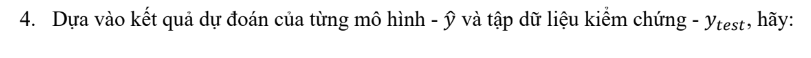
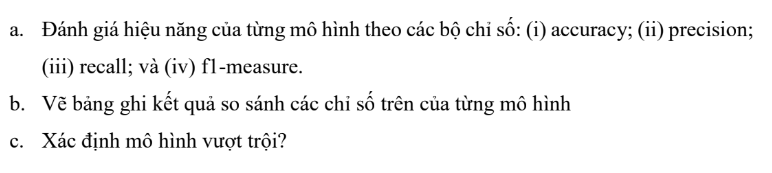

Mô Hình logistic
---

In [1379]:
y_hat = cross_val_predict(model, X_test, y_test, cv=10)
print("y du doan cua logistic",y_hat)

y du doan cua logistic [3. 1. 3. 1. 2. 1. 2. 3. 2. 1. 3. 2. 2. 2. 1. 2. 3. 1. 3. 2. 3. 1. 3. 3.
 3. 1. 3. 1. 1. 1. 2. 3. 1. 2. 3. 1.]


In [1380]:
ac=accuracy_score(y_hat, y_test)
print('Hiệu năng mô hình acc cua logistic : ', ac)
ps=precision_score(y_test, y_hat,average='macro')
print("Hiệu năng mô hình precision cua logistic",ps)
rs =recall_score(y_test, y_hat, average='macro')
print("Hiệu năng mô hình recall cua logistic",rs)
f1= 2*(ps*rs)/(ps+rs)
print("Hiệu năng mô hình f1 cua logistic",f1)
f1_score(y_test, y_hat, average='macro')

Hiệu năng mô hình acc cua logistic :  0.9166666666666666
Hiệu năng mô hình precision cua logistic 0.923076923076923
Hiệu năng mô hình recall cua logistic 0.923076923076923
Hiệu năng mô hình f1 cua logistic 0.923076923076923


0.9154106280193237

Text(0.5, 0, 'cac độ đo')

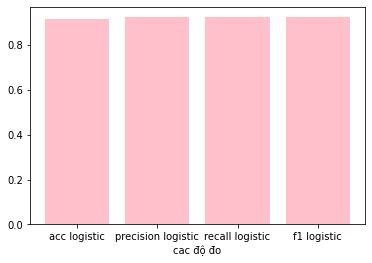

In [1381]:
coun=[ac,ps,rs,f1]
sticker=("acc logistic","precision logistic","recall logistic","f1 logistic")
plt.bar(sticker,coun,color="pink")
plt.xlabel("cac độ đo")

K-lân cận
---

In [1382]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN.fit(X_train, y_train)
y_hat_KNN = kNN.predict(X_test)
print("y dự đoán của K lân cận\n",y_hat_KNN)

y dự đoán của K lân cận
 [3. 1. 3. 2. 2. 1. 2. 3. 2. 1. 3. 2. 2. 1. 1. 2. 3. 1. 3. 2. 3. 1. 3. 3.
 3. 1. 3. 1. 1. 1. 2. 3. 1. 2. 3. 1.]


In [1383]:
ac_KNN=accuracy_score(y_hat_KNN, y_test)
print("Hiệu năng mô hình acc cua K lân cận",ac_KNN)
ps_KNN=precision_score(y_test, y_hat_KNN,average='macro')
print("Hiệu năng mô hình precision cua K lân cận",ps_KNN)
rs_KNN =recall_score(y_test, y_hat_KNN, average='macro')
print("Hiệu năng mô hình recall cua K lân cận",rs_KNN)
f1_KNN= 2*(ps_KNN*rs_KNN)/(ps_KNN+rs_KNN)
print("Hiệu năng mô hình f1 cua K lân cận",f1_KNN)
f1_score(y_test, y_hat_KNN, average='macro')

Hiệu năng mô hình acc cua K lân cận 0.9166666666666666
Hiệu năng mô hình precision cua K lân cận 0.923076923076923
Hiệu năng mô hình recall cua K lân cận 0.923076923076923
Hiệu năng mô hình f1 cua K lân cận 0.923076923076923


0.9154106280193237

Text(0.5, 0, 'cac độ đo tai KNN')

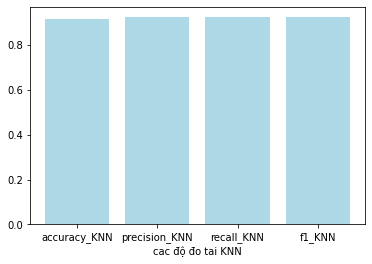

In [1384]:
coun1=[ac_KNN,ps_KNN,rs_KNN,f1_KNN]
sticker1=("accuracy_KNN","precision_KNN","recall_KNN","f1_KNN")
plt.bar(sticker1,coun1, width=0.8,color="lightblue")
plt.xlabel("cac độ đo tai KNN")

Ngây thơ
---

In [1385]:
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
y_hat_nv = gnb_model.predict(X_test)
print("y dự ddoasnd của Naive\n",y_hat_nv)

y dự ddoasnd của Naive
 [3. 1. 3. 2. 2. 1. 2. 3. 2. 1. 2. 2. 2. 2. 1. 2. 3. 1. 3. 2. 3. 1. 3. 3.
 3. 1. 3. 2. 1. 1. 2. 3. 1. 2. 3. 1.]


In [1386]:
ac_nv=accuracy_score(y_test,y_hat_nv)
print("Hiệu năng mô hình acc cua NAIVE",ac_nv)
ps_nv=precision_score(y_test, y_hat_nv,average='weighted')
print("Hiệu năng mô hình precision cua NAIVE",ps_nv)
rs_nv =recall_score(y_test, y_hat_nv, average='weighted')
print("Hiệu năng mô hình recall cua NAIVE",rs_nv)
f1_nv= 2*(ps_nv*rs_nv)/(ps_nv+rs_nv)
#f1_nv=f1_score(y_test, y_hat_KNN, average='weighted')
print("Hiệu năng mô hình f1 cua NAIVE",f1_nv)

Hiệu năng mô hình acc cua NAIVE 1.0
Hiệu năng mô hình precision cua NAIVE 1.0
Hiệu năng mô hình recall cua NAIVE 1.0
Hiệu năng mô hình f1 cua NAIVE 1.0


Text(0.5, 0, 'cac độ đo tai KNN')

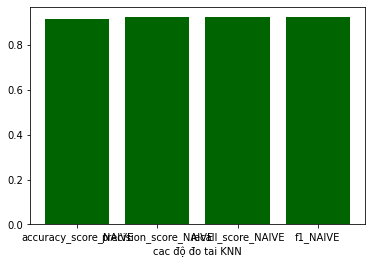

In [1387]:
coun2=[ac_nv,ps_nv,rs_nv,f1_nv]
sticker1=("accuracy_score_NAIVE","precision_score_NAIVE","recall_score_NAIVE","f1_NAIVE")
plt.bar(sticker1,coun1, width=0.8,color = 'darkgreen')
plt.xlabel("cac độ đo tai KNN")

so sanh kết quả 3 mô hình
---

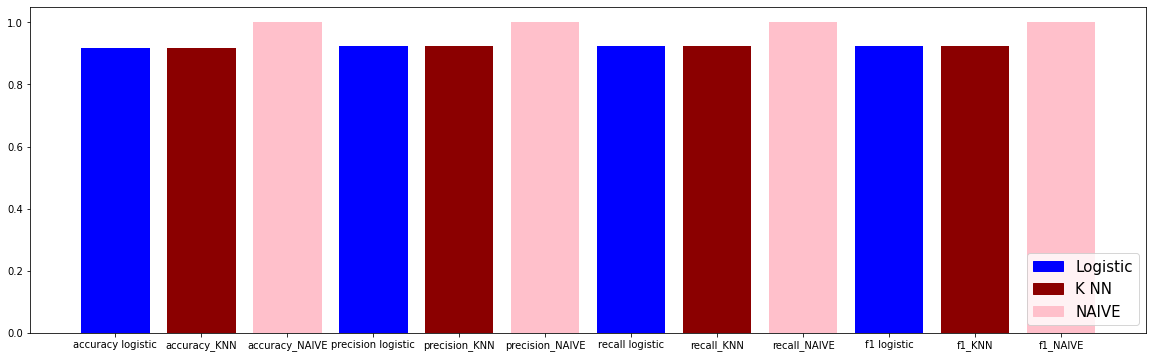

In [1388]:
from matplotlib.projections.polar import mpatches
f, ax = plt.subplots(figsize=(20,6)) # set the size that you'd like (width, height)
my_colors= ['blue','darkred', 'pink']
labels = ['logis','k lân cận','naive']
counss=[ac,ac_KNN,ac_nv]
counss2=[ps,ps_KNN,ps_nv]
counss3=[rs,ps_KNN,rs_nv]
countss4=[f1,f1_KNN,f1_nv]
stickerss=("accuracy logistic","accuracy_KNN","accuracy_NAIVE")
stickerss2=("precision logistic","precision_KNN","precision_NAIVE")
stickerss3=("recall logistic","recall_KNN","recall_NAIVE")
stickerss4=("f1 logistic","f1_KNN","f1_NAIVE")
plt.bar(stickerss,counss , label = 'accuracy_score',color=my_colors)
plt.bar(stickerss2,counss2, label = 'precision_score',color=my_colors)
plt.bar(stickerss3,counss3, label = 'recall_score',color=my_colors)
plt.bar(stickerss4,countss4, label = 'f1 bar',color=my_colors)
logistic = mpatches.Patch(color='Blue', label='Logistic')
KNN = mpatches.Patch(color='darkred', label='K NN')
NAIVE = mpatches.Patch(color='pink', label='NAIVE')

ax.legend(fontsize = 15,handles=[logistic,KNN,NAIVE],loc=4)

Đánh hiệu năng từng mô hình 
---

In [1389]:
counss=[ac,ac_KNN,ac_nv]
label = ['ac','ac_KNN','ac_nv']
for i in range(len(counss)):
  if counss[i] == max(counss):
    print("như vậy ta thấy mô hinh accuracy_score ",label[i],"lớn nhất la bằng",counss[i])
counss2=[ps,ps_KNN,ps_nv]
label2=["ps","ps_KNN","ps_nv"]
for i in range(len(counss2)):
  if counss2[i] == max(counss2):
    print("như vậy ta thấy mô hinh precision_score ",label2[i],"lớn nhất la bằng",counss2[i])    
counss3=[rs,ps_KNN,rs_nv]
label3=["rs","ps_KNN","rs_nv"]
for i in range(len(counss3)):
  if counss3[i] == max(counss3):
    print("như vậy ta thấy mô hinh recall_score",label3[i],"lớn nhất la bằng",counss3[i]) 
countss4=[f1,f1_KNN,f1_nv]
label4=["f1","f1_KNN","f1_nv"]
for i in range(len(countss4)):
  if countss4[i] == max(countss4):
    print("như vậy ta thấy mô hinh f1",label4[i],"lớn nhất la bằng",countss4[i])    

như vậy ta thấy mô hinh accuracy_score  ac_nv lớn nhất la bằng 1.0
như vậy ta thấy mô hinh precision_score  ps_nv lớn nhất la bằng 1.0
như vậy ta thấy mô hinh recall_score rs_nv lớn nhất la bằng 1.0
như vậy ta thấy mô hinh f1 f1_nv lớn nhất la bằng 1.0
